# Leukemia Subtypes Recognition 
###  → See Section 6 in Master Thesis : "Identification of Leukemia Subtypes" 

## • Imports & preprocessing 

In [1]:
# This Python 3 environment comes with many helpful anal,ytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

from keras import backend as K

import matplotlib.pyplot as plt

import allidb1_preproc

Using TensorFlow backend.


In [2]:
# Resize img folder (size divided by 10)
#preprocess.resize_folder("Datasets/ALL_IDB1/im")

# Create CSV from img folder
myFileList = allidb1_preproc.createFileList('LEUK-SUBTYPES/resized_im') 
allidb1_preproc.data_to_CSV(myFileList) # Uncomment to create the CSV file 

# get Y labels from the data 
myFileListForY = allidb1_preproc.createFileList('LEUK-SUBTYPES/resized_im') # ne met pas les images dans l'ordre donc y erroné#
y = allidb1_preproc.get_yLabels(myFileListForY)
#y = [[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0]]
print(y)

LEUK-SUBTYPES/resized_im
LEUK-SUBTYPES/resized_im\small_Im001_1.jpg
[147 158 161 ... 158 161 154]
LEUK-SUBTYPES/resized_im\small_Im002_1.jpg
[161 131 127 ... 120 138 141]
LEUK-SUBTYPES/resized_im\small_Im003_1.jpg
[131 128 142 ... 133 148 139]
LEUK-SUBTYPES/resized_im\small_Im004_1.jpg
[135 142 138 ... 145 148 149]
LEUK-SUBTYPES/resized_im\small_Im005_1.jpg
[174 164 174 ... 173 173 171]
LEUK-SUBTYPES/resized_im\small_Im006_1.jpg
[114 124 137 ... 158 135 122]
LEUK-SUBTYPES/resized_im\small_Im007_1.jpg
[145 133 149 ... 152 151 151]
LEUK-SUBTYPES/resized_im\small_Im008_1.jpg
[132 146 162 ... 153 158 157]
LEUK-SUBTYPES/resized_im\small_Im009_1.jpg
[128 135 152 ... 149 149 149]
LEUK-SUBTYPES/resized_im\small_Im010_1.jpg
[158 151 121 ...  48  78 131]
LEUK-SUBTYPES/resized_im\small_Im011_1.jpg
[159 143 131 ... 133 162 125]
LEUK-SUBTYPES/resized_im\small_Im012_1.jpg
[154 153 158 ... 151 154 149]
LEUK-SUBTYPES/resized_im\small_Im013_1.jpg
[154 155 153 ... 138 150 145]
LEUK-SUBTYPES/resized_im\s

LEUK-SUBTYPES/resized_im\small_Im116_1.jpg
[175 163 149 ... 131 132 133]
LEUK-SUBTYPES/resized_im\small_Im117_1.jpg
[129 135 150 ... 177 177 176]
LEUK-SUBTYPES/resized_im\small_Im118_1.jpg
[140 137 139 ... 162 161 162]
LEUK-SUBTYPES/resized_im\small_Im119_1.jpg
[176 183 176 ... 174 176 177]
LEUK-SUBTYPES/resized_im\small_Im120_1.jpg
[137 131 131 ... 135 141 155]
LEUK-SUBTYPES/resized_im\small_Im121_1.jpg
[127 127 131 ... 141 141 140]
LEUK-SUBTYPES/resized_im\small_Im122_1.jpg
[161 161 161 ... 152 163 164]
LEUK-SUBTYPES/resized_im\small_Im123_1.jpg
[138 142 145 ... 152 152 152]
LEUK-SUBTYPES/resized_im\small_Im124_1.jpg
[162 161 161 ... 160 160 160]
LEUK-SUBTYPES/resized_im\small_Im125_1.jpg
[165 166 164 ... 124 124 124]
LEUK-SUBTYPES/resized_im\small_Im126_1.jpg
[162 161 161 ... 149 154 157]
LEUK-SUBTYPES/resized_im\small_Im127_1.jpg
[121 124 116 ... 164 167 166]
LEUK-SUBTYPES/resized_im\small_Im128_1.jpg
[163 161 162 ... 134 133 132]
LEUK-SUBTYPES/resized_im\small_Im129_1.jpg
[110 119

LEUK-SUBTYPES/resized_im\small_Im243_0.jpg
[133 133 133 ... 165 165 167]
LEUK-SUBTYPES/resized_im\small_Im244_0.jpg
[154 156 157 ... 128 126 125]
LEUK-SUBTYPES/resized_im\small_Im245_0.jpg
[155 149 140 ... 147 147 149]
LEUK-SUBTYPES/resized_im\small_Im246_0.jpg
[156 155 154 ... 136 133 131]
LEUK-SUBTYPES/resized_im\small_Im247_0.jpg
[164 163 163 ... 146 146 148]
LEUK-SUBTYPES/resized_im\small_Im248_0.jpg
[128 127 126 ... 150 149 149]
LEUK-SUBTYPES/resized_im\small_Im249_0.jpg
[119 120 120 ... 121 121 121]
LEUK-SUBTYPES/resized_im\small_Im250_0.jpg
[133 134 135 ... 171 174 173]
LEUK-SUBTYPES/resized_im\small_Im251_0.jpg
[173 174 175 ... 124 122 121]
LEUK-SUBTYPES/resized_im\small_Im252_0.jpg
[165 168 167 ... 169 168 169]
LEUK-SUBTYPES/resized_im\small_Im253_0.jpg
[129 130 131 ... 140 140 140]
LEUK-SUBTYPES/resized_im\small_Im254_0.jpg
[148 146 142 ... 129 128 125]
LEUK-SUBTYPES/resized_im\small_Im255_0.jpg
[146 147 148 ... 120 119 119]
LEUK-SUBTYPES/resized_im\small_Im256_0.jpg
[149 147

LEUK-SUBTYPES/resized_im\small_Im357_0.jpg
[101 101  99 ... 115 114 115]
LEUK-SUBTYPES/resized_im\small_Im358_0.jpg
[90 90 89 ... 82 82 84]
LEUK-SUBTYPES/resized_im\small_Im359_0.jpg
[83 85 85 ... 80 78 77]
LEUK-SUBTYPES/resized_im\small_Im360_0.jpg
[ 97  99 101 ... 104 102 100]
LEUK-SUBTYPES/resized_im\small_Im361_0.jpg
[127 129 130 ... 124 126 128]
LEUK-SUBTYPES/resized_im\small_Im362_0.jpg
[102 101 100 ... 107 107 107]
LEUK-SUBTYPES/resized_im\small_Im363_0.jpg
[125 125 126 ... 124 124 124]
LEUK-SUBTYPES/resized_im\small_Im364_0.jpg
[149 149 144 ... 114 115 115]
LEUK-SUBTYPES/resized_im\small_Im365_0.jpg
[151 151 150 ... 143 133 123]
LEUK-SUBTYPES/resized_im\small_Im366_0.jpg
[151 150 149 ... 117 118 115]
LEUK-SUBTYPES/resized_im\small_Im367_0.jpg
[150 153 152 ... 119 120 121]
LEUK-SUBTYPES/resized_im\small_Im368_0.jpg
[148 148 139 ... 122 119 118]
LEUK-SUBTYPES/resized_im\small_Im369_2.jpg
[130 148 230 ... 253 254 254]
LEUK-SUBTYPES/resized_im\small_Im370_2.jpg
[129  97 167 ... 133

LEUK-SUBTYPES/resized_im\small_Im482_2.jpg
[219 221 217 ... 204 183 169]
LEUK-SUBTYPES/resized_im\small_Im483_2.jpg
[228 233 227 ... 219 221 223]
LEUK-SUBTYPES/resized_im\small_Im484_2.jpg
[206 211 208 ... 209 210 210]
LEUK-SUBTYPES/resized_im\small_Im485_2.jpg
[166 148 152 ... 237 237 236]
LEUK-SUBTYPES/resized_im\small_Im486_2.jpg
[101 101  99 ... 215 223 220]
LEUK-SUBTYPES/resized_im\small_Im487_2.jpg
[168 173 174 ... 209 207 207]
LEUK-SUBTYPES/resized_im\small_Im488_2.jpg
[ 78 147 116 ... 207 226 235]
LEUK-SUBTYPES/resized_im\small_Im489_2.jpg
[161 144 146 ... 150 144 144]
LEUK-SUBTYPES/resized_im\small_Im490_2.jpg
[199 204 203 ... 202 203 204]
LEUK-SUBTYPES/resized_im\small_Im491_2.jpg
[211 209 206 ... 209 212 213]
LEUK-SUBTYPES/resized_im\small_Im492_2.jpg
[133 206 212 ... 228 228 230]
LEUK-SUBTYPES/resized_im\small_Im493_2.jpg
[171 172 168 ... 213 184 163]
LEUK-SUBTYPES/resized_im\small_Im494_2.jpg
[144 175 209 ...  70  63 100]
LEUK-SUBTYPES/resized_im\small_Im495_2.jpg
[144 203

[179 144 158 ... 236 243 112]
LEUK-SUBTYPES/resized_im\small_Im609_3.jpg
[117 197 245 ...  72  78  89]
LEUK-SUBTYPES/resized_im\small_Im610_3.jpg
[183 181 177 ... 206 220 220]
LEUK-SUBTYPES/resized_im\small_Im611_3.jpg
[252 249 246 ... 199 187 243]
LEUK-SUBTYPES/resized_im\small_Im612_3.jpg
[182 169 211 ... 217 219 211]
LEUK-SUBTYPES/resized_im\small_Im613_3.jpg
[251 246 224 ... 189 198 196]
LEUK-SUBTYPES/resized_im\small_Im614_3.jpg
[255 249 255 ... 221 248 252]
LEUK-SUBTYPES/resized_im\small_Im615_3.jpg
[150 139 206 ... 148 210 239]
LEUK-SUBTYPES/resized_im\small_Im616_3.jpg
[202 172 187 ... 219 239 205]
LEUK-SUBTYPES/resized_im\small_Im617_3.jpg
[ 75 119  82 ... 111 134  83]
LEUK-SUBTYPES/resized_im\small_Im618_3.jpg
[227 231 180 ... 252 253 252]
LEUK-SUBTYPES/resized_im\small_Im619_3.jpg
[199 202 214 ... 250 255 251]
LEUK-SUBTYPES/resized_im\small_Im620_3.jpg
[191 127 160 ... 211 176 208]
LEUK-SUBTYPES/resized_im\small_Im621_3.jpg
[188 183 242 ... 142 193 236]
LEUK-SUBTYPES/resized

LEUK-SUBTYPES/resized_im\small_Im741_4.jpg
[236 244 228 ... 249 250 251]
LEUK-SUBTYPES/resized_im\small_Im742_4.jpg
[245 251 252 ... 137 117 131]
LEUK-SUBTYPES/resized_im\small_Im743_4.jpg
[165 122 139 ...  94 150 240]
LEUK-SUBTYPES/resized_im\small_Im744_4.jpg
[232 235 167 ... 193 156 143]
LEUK-SUBTYPES/resized_im\small_Im745_4.jpg
[195 206 235 ... 192 226 220]
LEUK-SUBTYPES/resized_im\small_Im746_4.jpg
[ 87  75  70 ...  88  74 103]
LEUK-SUBTYPES/resized_im\small_Im747_4.jpg
[ 52 114 112 ... 225 237  90]
LEUK-SUBTYPES/resized_im\small_Im748_4.jpg
[162 172 176 ... 240 241 243]
LEUK-SUBTYPES/resized_im\small_Im749_4.jpg
[254 254 254 ... 255 255 255]
LEUK-SUBTYPES/resized_im\small_Im750_4.jpg
[211 238 183 ... 103 154  91]
LEUK-SUBTYPES/resized_im\small_Im751_4.jpg
[224 189 201 ... 140 111 117]
LEUK-SUBTYPES/resized_im\small_Im752_4.jpg
[253 254 253 ... 255 255 255]
LEUK-SUBTYPES/resized_im\small_Im753_4.jpg
[219 250 252 ... 255 255 255]
LEUK-SUBTYPES/resized_im\small_Im754_4.jpg
[253 213

LEUK-SUBTYPES/resized_im\small_Im856_4.jpg
[147 112 117 ... 102 102 102]
LEUK-SUBTYPES/resized_im\small_Im857_4.jpg
[ 69 164 150 ...  96 106  43]
LEUK-SUBTYPES/resized_im\small_Im858_4.jpg
[81 88 91 ... 80 76 75]
LEUK-SUBTYPES/resized_im\small_Im859_4.jpg
[104 119 134 ... 178 181 184]
LEUK-SUBTYPES/resized_im\small_Im860_4.jpg
[148 189 191 ... 146 194 122]
LEUK-SUBTYPES/resized_im\small_Im861_4.jpg
[253 253 255 ... 255 255 255]
LEUK-SUBTYPES/resized_im\small_Im862_4.jpg
[213 213 209 ... 204 214 230]
LEUK-SUBTYPES/resized_im\small_Im863_4.jpg
[212 213 214 ... 153 129 152]
LEUK-SUBTYPES/resized_im\small_Im864_4.jpg
[104  85  91 ... 192 199 217]
LEUK-SUBTYPES/resized_im\small_Im865_4.jpg
[ 45  44  53 ... 238 236 236]
LEUK-SUBTYPES/resized_im\small_Im866_4.jpg
[212 184 205 ... 233 233 233]
LEUK-SUBTYPES/resized_im\small_Im867_4.jpg
[ 71 154 151 ... 182 178  74]
LEUK-SUBTYPES/resized_im\small_Im868_4.jpg
[238 239 237 ... 236 236 235]
LEUK-SUBTYPES/resized_im\small_Im869_4.jpg
[253 254 253 .

## • Training set & test set definition

In [3]:
# Read training and test data files
data = pd.read_csv("resizedLEUKSUBTYPES-grey.csv")
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2) 


print("\nX_train:\n")
print(X_train.head())
print(X_train.shape)

print("\nX_test:\n")
print(X_test.head())
print(X_test.shape)

X_train = X_train.values
X_test = X_test.values 


X_train:

       0    1    2    3    4    5    6    7    8    9  ...  9990  9991  9992  \
702  186  243  140   48   63   96   93   38   41   21  ...   139   209   156   
897  250  230  228  211  161  210  219  216  229  238  ...   196   209   235   
692  134  138  166  148  118  110   98  180   90   84  ...   113   124   100   
362  125  125  126  126  126  127  125  124  126  125  ...   124   124   123   
223   93   93   96   98   96   94   96   99   96   97  ...   142   140   140   

     9993  9994  9995  9996  9997  9998  9999  
702   205   249   242   237   128    50    69  
897   231   235   221   173   184   201   227  
692   153   101   126   134   152   141   135  
362   122   125   124   124   124   124   124  
223   140   138   137   138   137   137   137  

[5 rows x 10000 columns]
(732, 10000)

X_test:

       0    1    2    3    4    5    6    7    8    9  ...  9990  9991  9992  \
794  215  181  199  219  214  210  195  184  239  247  ...   250   248   246   
339  119  1

In [4]:
print(len(X_train))
print(len(y_train))

732
732


In [5]:
# normalize the inputs from 0-255 to between 0 and 1 by dividing by 255
trainX = X_train.reshape(X_train.shape[0],1,100, 100).astype( 'float32' )
X_train = trainX / 255.0 

testX = X_test.reshape(X_test.shape[0],1,100, 100).astype( 'float32' )
X_test = testX / 255.0 

In [6]:
# specify the number of classes that are in the dataset, so we know how many neurons to compress the final layer down to 
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

class_num = y_test.shape[1]
print(class_num)

5


## • Creating the CNN

In [7]:
model = Sequential()
K.common.set_image_dim_ordering('th')

dropoutValue = 0.1 # why bad? https://stats.stackexchange.com/questions/299292/dropout-makes-performance-wors

model.add(Convolution2D(32, (3, 3), input_shape=(1, 100, 100), activation= 'relu' ))
#model.add(Dropout(dropoutValue)) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3, 3), activation= 'relu' ))
#model.add(Dropout(dropoutValue)) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(128, (3, 3), activation= 'relu' ))
#model.add(Dropout(dropoutValue)) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256, activation= 'relu' ))
#model.add(Dropout(dropoutValue)) 
model.add(BatchNormalization())

model.add(Dense(128, activation= 'relu' ))
#model.add(Dropout(dropoutValue)) 
model.add(BatchNormalization())

model.add(Dense(64, activation= 'relu' ))
#model.add(Dropout(dropoutValue)) 
model.add(BatchNormalization())

model.add(Dense(class_num, activation= 'softmax' ))

In [8]:
 # Compile model
model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 98, 98)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 98, 98)        392       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 49, 49)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 47, 47)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 47, 47)        188       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 23, 23)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 21, 21)       73856     
__________

In [9]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25,batch_size=32)

Train on 732 samples, validate on 183 samples
Epoch 1/25
732/732 [==============================] - 36s 50ms/step - loss: 1.1617 - acc: 0.4686 - val_loss: 5.6242 - val_acc: 0.3443
Epoch 2/25
732/732 [==============================] - 34s 46ms/step - loss: 0.8608 - acc: 0.6175 - val_loss: 1.5376 - val_acc: 0.4153
Epoch 3/25
732/732 [==============================] - 33s 45ms/step - loss: 0.7691 - acc: 0.6680 - val_loss: 10.5739 - val_acc: 0.1803
Epoch 4/25
732/732 [==============================] - 32s 43ms/step - loss: 0.7514 - acc: 0.6762 - val_loss: 4.6714 - val_acc: 0.2514
Epoch 5/25
732/732 [==============================] - 31s 43ms/step - loss: 0.6638 - acc: 0.7404 - val_loss: 7.1855 - val_acc: 0.2514
Epoch 6/25
732/732 [==============================] - 32s 44ms/step - loss: 0.5765 - acc: 0.7855 - val_loss: 3.3961 - val_acc: 0.4153
Epoch 7/25
732/732 [==============================] - 34s 46ms/step - loss: 0.4577 - acc: 0.8374 - val_loss: 2.0764 - val_acc: 0.3497
Epoch 8/25
732/

In [10]:
# Model evaluation
_, acc = model.evaluate(X_test, y_test)
print('accuracy > %.3f' % (acc * 100.0))

183/183 [==============================] - 2s 11ms/step
accuracy > 32.787


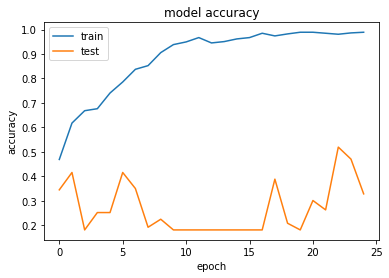

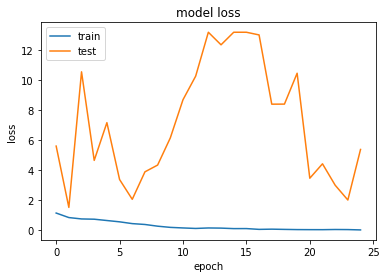

In [11]:
# plot diagnostic learning curves
def summarize_diagnostics_by_epochs(history):
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss --> https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

summarize_diagnostics_by_epochs(history)

---------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------

## --- Results accuracy ---

### • LEUKEMIA SUBTYPES (train set = 732 imgs, test set = 183 imgs)

→ Preprocessing: size reduced to 100x100 | On 25 epochs and 32 batch size 

#### Baseline results (no dropout, no data augmentation) with color: 
- Run 1: <i>Train set:</i>  | <i>Test set:</i> 
- Run 2: <i>Train set:</i>  | <i>Test set:</i> 
- Run 3: <i>Train set:</i>  | <i>Test set:</i> 
- Run 4: <i>Train set:</i>  | <i>Test set:</i> 
- Run 5: <i>Train set:</i>  | <i>Test set:</i> 
- <b>Average:</b> <i>Train set:</i> <b></b> | <i>Test set:</i> <b></b> 

<center>Run 1 figure:</center>
<img src="figures_result/leuk_subtypes-baseline.png">

#### Baseline results (no dropout, no data augmentation) with greyscale:
- Run 1: <i>Train set:</i>  | <i>Test set:</i> 
- Run 2: <i>Train set:</i>  | <i>Test set:</i> 
- Run 3: <i>Train set:</i>  | <i>Test set:</i> 
- Run 4: <i>Train set:</i>  | <i>Test set:</i> 
- Run 5: <i>Train set:</i>  | <i>Test set:</i> 
- <b>Average:</b> <i>Train set:</i> <b></b> | <i>Test set:</i> <b></b> 

<center>Run 1 figure:</center>
<img src="figures_result/leuk_subtypes-baseline.png">

#### Dropout of 0.1:
- Run 1: <i>Train set:</i>  | <i>Test set:</i> 
- Run 2: <i>Train set:</i>  | <i>Test set:</i> 
- Run 3: <i>Train set:</i>  | <i>Test set:</i> 
- Run 4: <i>Train set:</i>  | <i>Test set:</i> 
- Run 5: <i>Train set:</i>  | <i>Test set:</i> 
- <b>Average:</b> <i>Train set:</i> <b></b> | <i>Test set:</i> <b></b> 

<center>Run 1 figure:</center>
<img src="figures_result/leuk_subtypes-baseline.png">

#### With data augmentation (Train set = ... imgs, test set = ... imgs): 
- Run 1: <i>Train set:</i>  | <i>Test set:</i> 
- Run 2: <i>Train set:</i>  | <i>Test set:</i> 
- Run 3: <i>Train set:</i>  | <i>Test set:</i> 
- Run 4: <i>Train set:</i>  | <i>Test set:</i> 
- Run 5: <i>Train set:</i>  | <i>Test set:</i> 
- <b>Average:</b> <i>Train set:</i> <b></b> | <i>Test set:</i> <b></b> 

<center>Run 1 figure:</center>
<img src="figures_result/leuk_subtypes-baseline.png">

#### With dropout and data augmentation: 
- Run 1: <i>Train set:</i>  | <i>Test set:</i> 
- Run 2: <i>Train set:</i>  | <i>Test set:</i> 
- Run 3: <i>Train set:</i>  | <i>Test set:</i> 
- Run 4: <i>Train set:</i>  | <i>Test set:</i> 
- Run 5: <i>Train set:</i>  | <i>Test set:</i> 
- <b>Average:</b> <i>Train set:</i> <b></b> | <i>Test set:</i> <b></b> 

<center>Run 1 figure:</center>
<img src="figures_result/leuk_subtypes-baseline.png">